In [6]:
import numpy as np
import pandas as pd

In [7]:
ds = pd.read_csv("Churn_Modelling.csv")

In [8]:
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
ds.drop(columns = ["RowNumber", "CustomerId", "Surname"], axis = 1, inplace = True)

In [10]:
ds.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
ds.loc[ds["Gender"] == "Male" , ["Gender"] ] = 0
ds.loc[ds["Gender"] == "Female", ["Gender"] ] = 1

In [12]:
ds.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [13]:
ds = pd.get_dummies(ds, columns = ["Geography"], dtype = "int32")

In [14]:
ds.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [15]:
def min_max_normalization(feature):
    global ds
    ds[feature] = ds[feature].astype("float32")
    ds[feature] = (ds[feature] - ds[feature].min()) / (ds[feature].max() - ds[feature].min())
    


In [16]:
cols = ["CreditScore", "Balance", "NumOfProducts", "HasCrCard", "EstimatedSalary", "Age", "Tenure"]
for col in cols:
    min_max_normalization(col)


In [17]:
ds.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1.0,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0.0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1.0,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0.0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1.0,1,0.395400,0,0,0,1


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = ds.drop(["Exited"], axis = 1).to_numpy().astype("float32")

In [20]:
Y = ds["Exited"].to_numpy()

In [21]:
X

array([[0.538     , 1.        , 0.3243243 , ..., 1.        , 0.        ,
        0.        ],
       [0.516     , 1.        , 0.3108108 , ..., 0.        , 0.        ,
        1.        ],
       [0.304     , 1.        , 0.3243243 , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.718     , 1.        , 0.24324325, ..., 1.        , 0.        ,
        0.        ],
       [0.844     , 0.        , 0.3243243 , ..., 0.        , 1.        ,
        0.        ],
       [0.884     , 1.        , 0.13513513, ..., 1.        , 0.        ,
        0.        ]], dtype=float32)

In [22]:
Y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [24]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver = "lbfgs", alpha = 1e-5, hidden_layer_sizes = (5,2), random_state = 1)

In [25]:
model.fit(x_train, y_train)

C:\Users\AKASH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [26]:
y_pred = model.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

print("Accuracy score : ", accuracy_score(y_test, y_pred))

Accuracy score :  0.861


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.44      0.55       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

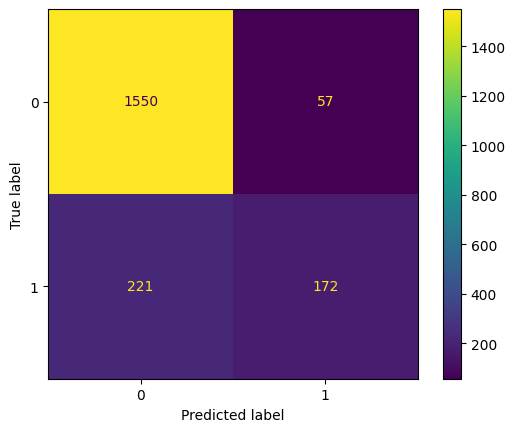

<Axes: >

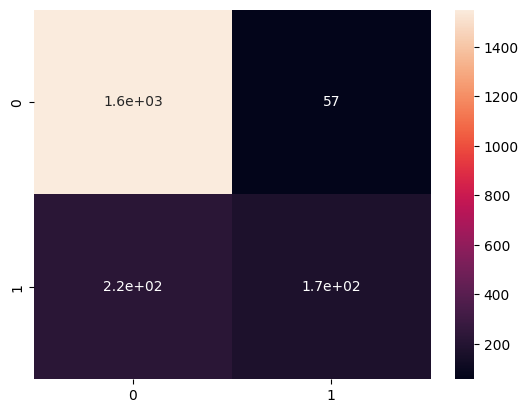

In [32]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot()
plt.show()
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)